In [3]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [4]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]

Feature ranking:
1. feature 11 (0.045928) - 0.012565
2. feature 158 (0.037083) - 0.039779
3. feature 193 (0.027034) - 0.033132
4. feature 208 (0.015844) - 0.029803
5. feature 87 (0.014703) - 0.018687
6. feature 23 (0.012355) - 0.020812
7. feature 0 (0.012179) - 0.022763
8. feature 156 (0.010336) - 0.008159
9. feature 82 (0.009285) - 0.016684
10. feature 3 (0.008884) - 0.006645
11. feature 157 (0.008666) - 0.008440
12. feature 222 (0.008442) - 0.007394
13. feature 138 (0.008415) - 0.014984
14. feature 173 (0.008364) - 0.006299
15. feature 196 (0.008017) - 0.006238
16. feature 203 (0.007846) - 0.006021
17. feature 151 (0.007728) - 0.006804
18. feature 51 (0.007705) - 0.011455
19. feature 140 (0.007679) - 0.006487
20. feature 86 (0.007652) - 0.005984
21. feature 120 (0.007173) - 0.009197
22. feature 52 (0.007104) - 0.005720
23. feature 12 (0.007092) - 0.011473
24. feature 56 (0.006981) - 0.005702
25. feature 4 (0.006834) - 0.005698
26. feature 21 (0.006750) - 0.006387
27. feature 192 (0.0

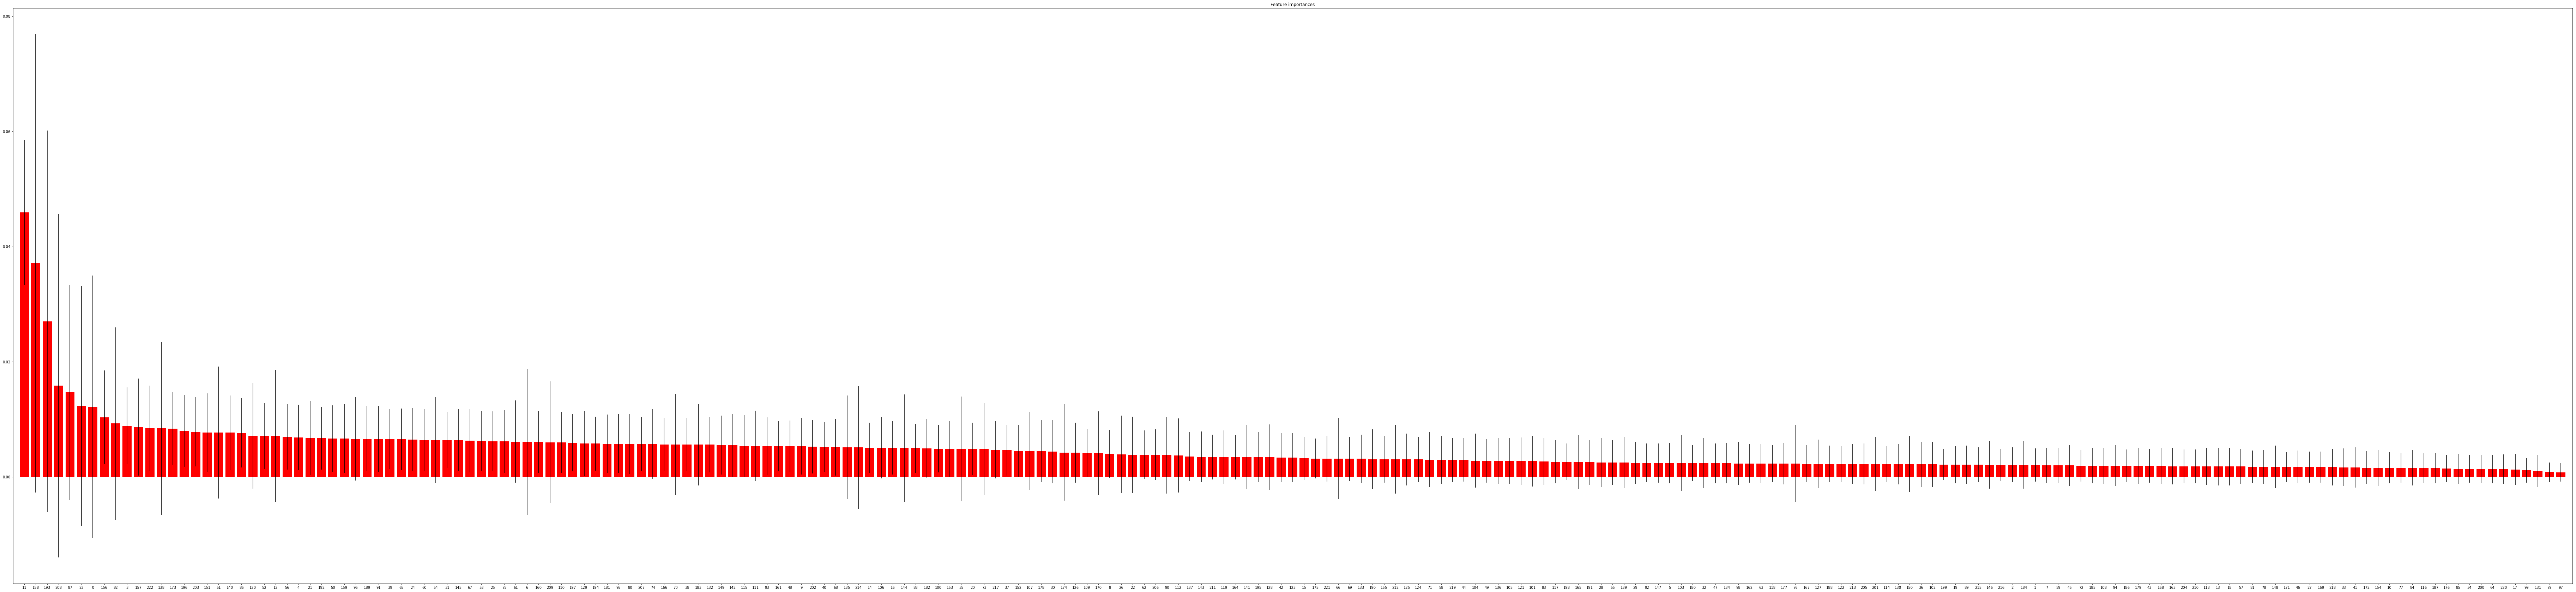

0.55344737769016517

In [5]:
XX = pd.DataFrame()
model = RandomForestClassifier(n_estimators=1600,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced",
                               random_state=4242)
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) - %f" % (f + 1, indices[f], importances[indices[f]], std[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, y, scoring='f1', cv=3).mean()